# Plot an histogram from a distance calculation between a cloud and a mesh

Useful generic imports...

In [28]:
import os
import sys
import math
import psutil

When CloudComPy is imported, all converters from C++ to Python and vice-versa are initialized. 
C++ Debug traces can be activated by setting an environment variable _CCTRACE_="ON" before launching CloudComPy. 
(this variable seems to have no effect on Windows jupyter notebook...)

In [29]:
#os.environ["_CCTRACE_"]="ON"
import cloudComPy as cc

The gendata module provides several functions used for automatic testing.

In [30]:
from gendata import getSampleCloud, dataDir

To do once before using plugins or dealing with numpy

In [31]:
cc.initCC()

Get a sample cloud

In [32]:
cloud1 = cc.loadPointCloud(getSampleCloud(5.0))

In [33]:
cloud = cc.loadPointCloud("smallsection-processed_LLS_2024-03-15T051615.010100_0_3.las")

Generate a mesh: a cylinder, translated

In [34]:
tr3 = cc.ccGLMatrix()
tr3.initFromParameters(0., (0., 0., 0.), (3.0, 0.0, 4.0))
cylinder = cc.ccCylinder(0.5, 3.0, tr3, 'aCylinder', 48)

Parameters for distance computation between a cloud and a mesh.
The max thread count depends on your processor, and a good compromise for octree level
can be found with cc.DistanceComputationTools.determineBestOctreeLevel.

In [35]:
nbCpu = psutil.cpu_count()
bestOctreeLevel = cc.DistanceComputationTools.determineBestOctreeLevel(cloud, cylinder)
params = cc.Cloud2MeshDistancesComputationParams()
params.maxThreadCount=nbCpu
params.octreeLevel=bestOctreeLevel

The compute distance may take a while, and returns ```True``` if success.

In [36]:
%%time
cc.DistanceComputationTools.computeCloud2MeshDistances(cloud, cylinder, params)

CPU times: total: 6.25 s
Wall time: 533 ms


1

MatPlotLib imports. The magic command ```%matplotlib inline``` is used by Jupyter for plot inside notebook.

In [37]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

The computed distance scalar field is used as a Numpy Array.

In [38]:
dic = cloud.getScalarFieldDic()
sf=cloud.getScalarField(dic['C2M absolute distances'])
asf= sf.toNpArray()

Plot histogram of the distance scalar field.

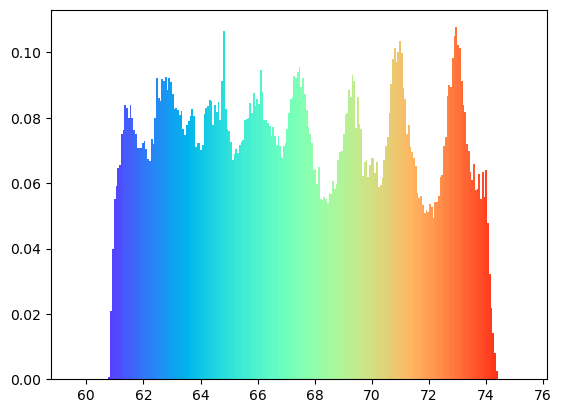

In [39]:
(n, bins, patches) = plt.hist(asf, bins=256, density=1) # histogram for matplotlib
fracs = bins / bins.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.rainbow(norm(thisfrac))
    thispatch.set_facecolor(color)

In [40]:
#res = cc.SavePointCloud(filteredCloud,"myModifiedCloud.bin")